## NE3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Gpp = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_r_m_s/LandSat_Gpp.csv')
ndvi = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_r_m_s/LandSat_NDVI.csv')
Nppy = pd.read_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_r_m_s/LandSat_Nppy.csv')

In [ ]:
Gpp.shape

(153755, 6)

In [ ]:

Gpp.head()

,system:index,Date,GPP,latitude,longitude,.geo
0,0,2.015010e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
1,1,2.015012e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
2,2,2.015020e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
3,3,2.015022e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
4,4,2.015031e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."


In [ ]:
Gpp.isna().sum()

,0
system:index,0
Date,0
GPP,5189
latitude,0
longitude,0
.geo,0


In [ ]:
Gpp.dropna(inplace=True)

In [ ]:
Gpp.drop(columns=['system:index'], inplace=True)
Gpp['GPP'] = Gpp['GPP'] * 0.0001
Gpp['Date'] = Gpp['Date'].astype(str)
Gpp['Date'] = Gpp['Date'].str[:8]
Gpp['Date'] = Gpp['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Gpp['Date'] = pd.to_datetime(Gpp['Date'], format='%Y%m%d', errors='coerce')
Gpp.head()

,Date,GPP,latitude,longitude,.geo
161,2015-01-01,0.0004,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
162,2015-01-16,0.0029,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
163,2015-02-01,0.0019,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
164,2015-02-17,0.0005,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
165,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."


In [ ]:
Gpp['Year'] = Gpp['Date'].dt.year

In [ ]:
Gpp.head()

,Date,GPP,latitude,longitude,.geo,Year
161,2015-01-01,0.0004,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015
162,2015-01-16,0.0029,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015
163,2015-02-01,0.0019,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015
164,2015-02-17,0.0005,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015
165,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015


In [ ]:
Gppy = pd.DataFrame(Gpp.groupby(['Year','latitude','longitude'])['GPP'].sum()).reset_index()

In [ ]:
Gppy.head()

,Year,latitude,longitude,GPP
0,2015,41.175943,-96.444431,1.6057
1,2015,41.175943,-96.444162,1.4876
2,2015,41.175943,-96.443892,1.4492
3,2015,41.175943,-96.443623,1.4661
4,2015,41.175943,-96.443353,1.4566


In [ ]:
Gppy.rename(columns={'GPP': 'Gppy'}, inplace=True)

In [ ]:
Gppy.shape

(6469, 4)

In [ ]:

Gpp_merged = pd.merge(Gpp, Gppy, on=['Year', 'latitude','longitude'], how='inner')
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Year,Gppy
0,2015-01-01,0.0004,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015,1.6057
1,2015-01-16,0.0029,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015,1.6057
2,2015-02-01,0.0019,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015,1.6057
3,2015-02-17,0.0005,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015,1.6057
4,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",2015,1.6057


In [ ]:
Gpp_merged.shape

(148566, 7)

In [ ]:
Gpp_merged.drop(columns=['Year'],inplace=True)

In [ ]:
Gpp_merged.head()

,Date,GPP,latitude,longitude,.geo,Gppy
0,2015-01-01,0.0004,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057
1,2015-01-16,0.0029,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057
2,2015-02-01,0.0019,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057
3,2015-02-17,0.0005,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057
4,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057


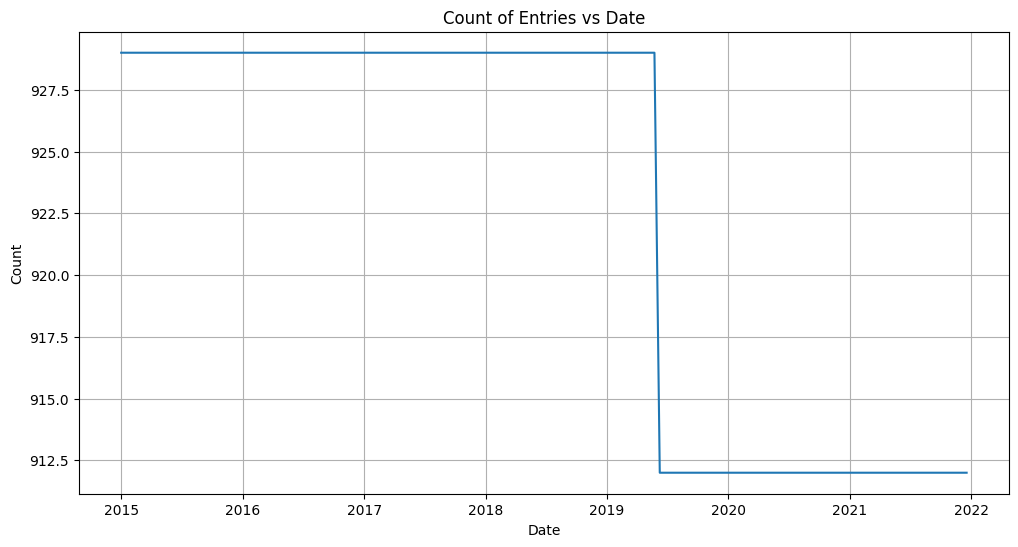

In [ ]:
# Group by date and count the number of entries
date_counts = Gpp_merged.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date')
plt.grid(True)
plt.show()


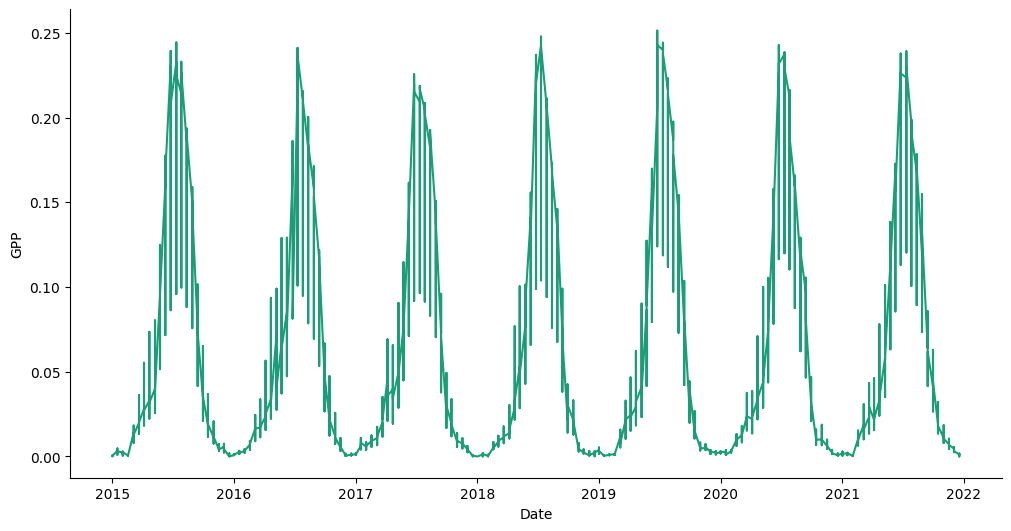

In [ ]:
# @title Date vs GPP

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['GPP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Gpp_merged.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('GPP')

In [ ]:
unique_date_lat_lon = Gpp_merged[['latitude', 'longitude']].drop_duplicates()
print(unique_date_lat_lon)

         latitude  longitude
0       41.175943 -96.444431
161     41.175943 -96.444162
322     41.175943 -96.443892
483     41.175943 -96.443623
644     41.175943 -96.443353
...           ...        ...
147761  41.182680 -96.436347
147922  41.182680 -96.436077
148083  41.182680 -96.435808
148244  41.182680 -96.435538
148405  41.182680 -96.435269

[929 rows x 2 columns]


In [ ]:
ndvi.head()

,system:index,Date,NDVI,latitude,longitude,.geo
0,0,2.015010e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
1,1,2.015011e+11,0.232051,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
2,2,2.015012e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
3,3,2.015012e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
4,4,2.015020e+11,NaN,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."


In [ ]:
ndvi.shape

(307510, 6)

In [ ]:
ndvi.isna().sum()

,0
system:index,0
Date,0
NDVI,235917
latitude,0
longitude,0
.geo,0


In [ ]:
ndvi.dropna(inplace=True)

In [ ]:
ndvi.shape

(71593, 6)

In [ ]:
ndvi.drop(columns=['system:index'], inplace=True)
ndvi['NDVI'] = ndvi['NDVI']
ndvi['Date'] = ndvi['Date'].astype(str)
ndvi['Date'] = ndvi['Date'].str[:8]
ndvi['Date'] = ndvi['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
ndvi['Date'] = pd.to_datetime(ndvi['Date'], format='%Y%m%d', errors='coerce')
ndvi.head()

,Date,NDVI,latitude,longitude,.geo
1,2015-01-09,0.232051,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
7,2015-02-26,0.189403,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
8,2015-03-06,0.131938,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
9,2015-03-14,0.197226,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."
13,2015-04-14,0.432353,41.175943,-96.444701,"{""type"":""Point"",""coordinates"":[-96.44470095481..."


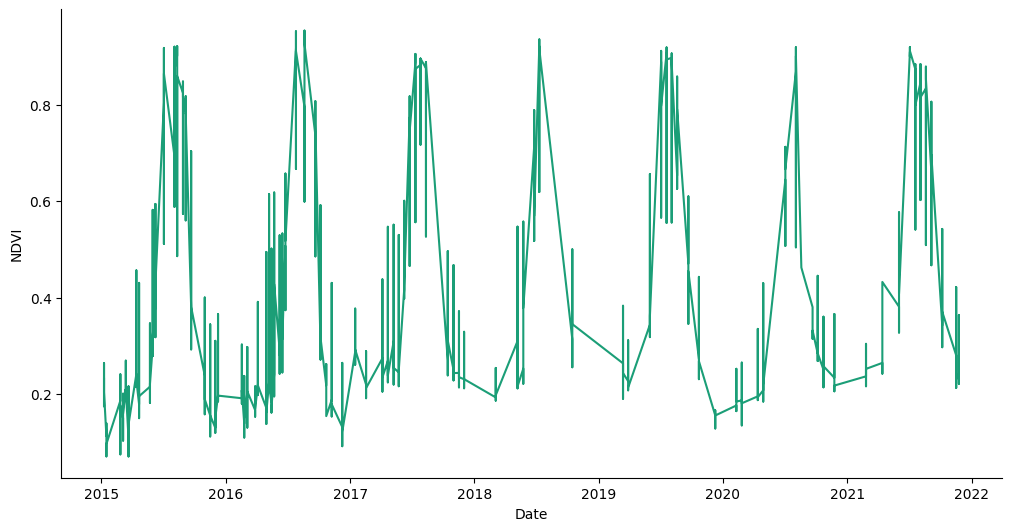

In [ ]:
# @title Date vs NDVI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['NDVI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ndvi.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NDVI')

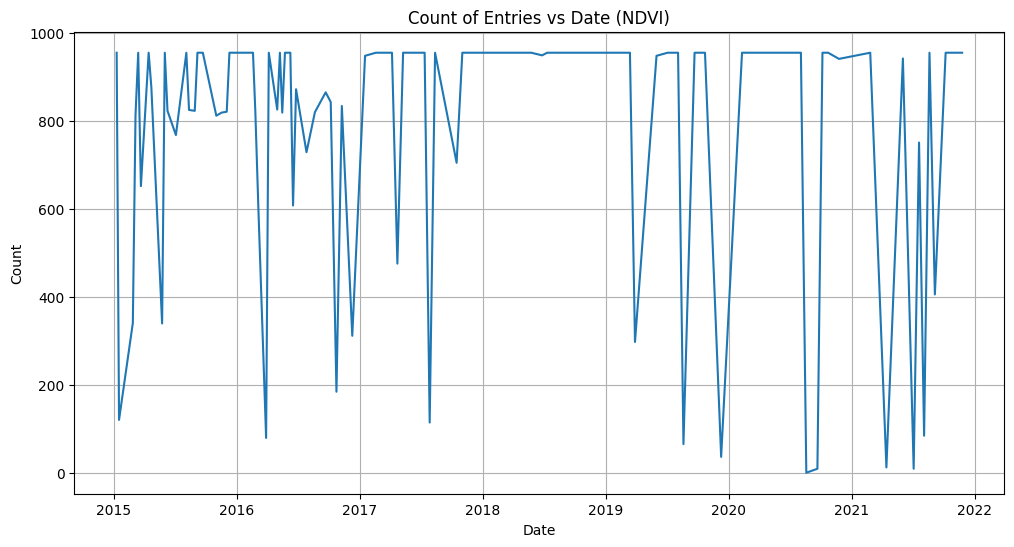

In [ ]:
# Group by date and count the number of entries
date_counts_ndvi = ndvi.groupby('Date').size()

# Plotting the counts vs date
plt.figure(figsize=(12, 6))
plt.plot(date_counts_ndvi.index, date_counts_ndvi.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Entries vs Date (NDVI)')
plt.grid(True)
plt.show()


In [ ]:
ndvi.drop(columns=['.geo'],inplace=True)

In [ ]:
#merge Gpp and NDVI on Date, latitude and longitude

merged_df = pd.merge(Gpp_merged, ndvi, on=['Date', 'latitude', 'longitude'], how='inner')
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI
0,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.152168
1,2015-04-22,0.0648,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.390776
2,2015-06-09,0.1390,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.556983
3,2015-08-12,0.1513,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.605711
4,2015-08-29,0.1422,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.658101


In [ ]:
merged_df.shape

(33200, 7)

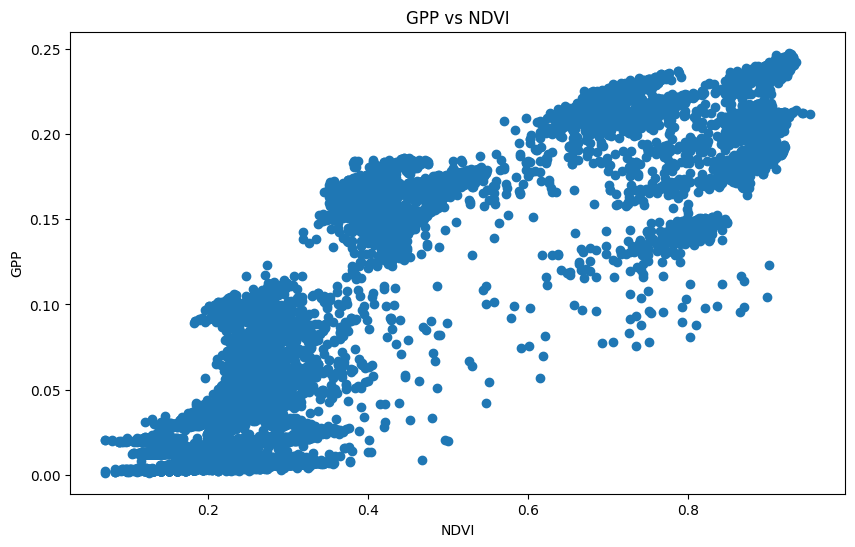

In [ ]:
# @title GPP vs NDVI

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['NDVI'], merged_df['GPP'])
plt.xlabel('NDVI')
plt.ylabel('GPP')
_ = plt.title('GPP vs NDVI')


In [ ]:
Nppy.shape

(5730, 6)

In [ ]:
Nppy.isna().sum()

,0
system:index,0
Date,0
NPPy,190
latitude,0
longitude,0
.geo,0


In [ ]:
Nppy.dropna(inplace=True)

In [ ]:
Nppy.head()

,system:index,Date,NPPy,latitude,longitude,.geo
6,6,2.015010e+11,9215.0,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
7,7,2.016010e+11,9268.0,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
8,8,2.017010e+11,8847.0,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
9,9,2.018010e+11,8366.0,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
10,10,2.019010e+11,9210.0,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."


In [ ]:
Nppy.drop(columns=['system:index'], inplace=True)
Nppy['NPPy'] = Nppy['NPPy']*0.0001
Nppy['Date'] = Nppy['Date'].astype(str)
Nppy['Date'] = Nppy['Date'].str[:8]
Nppy['Date'] = Nppy['Date'].apply(lambda x: x[:-2] + '01' if x.endswith('00') else x)
Nppy['Date'] = pd.to_datetime(Nppy['Date'], format='%Y%m%d', errors='coerce')
Nppy.head()

,Date,NPPy,latitude,longitude,.geo
6,2015-01-01,0.9215,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
7,2016-01-01,0.9268,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
8,2017-01-01,0.8847,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
9,2018-01-01,0.8366,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."
10,2019-01-01,0.9210,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023..."


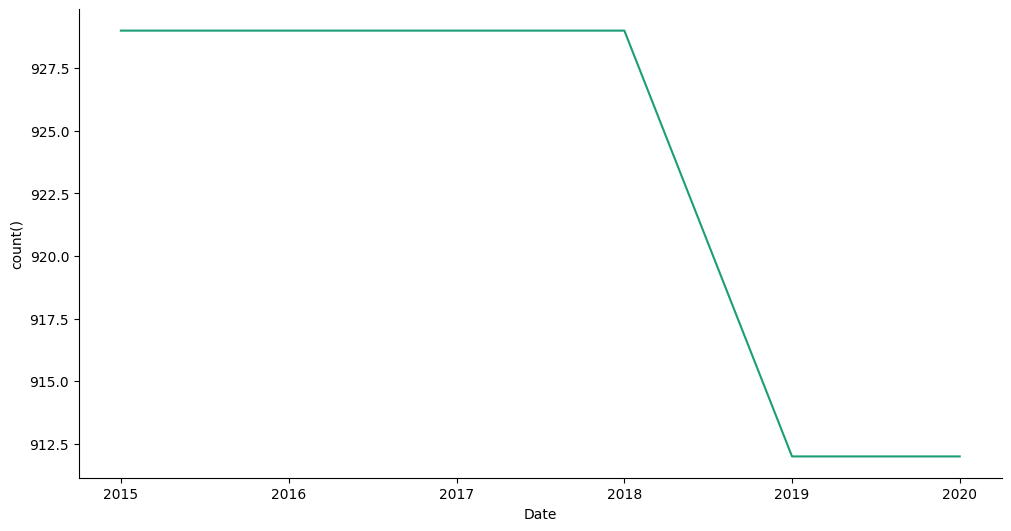

In [ ]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

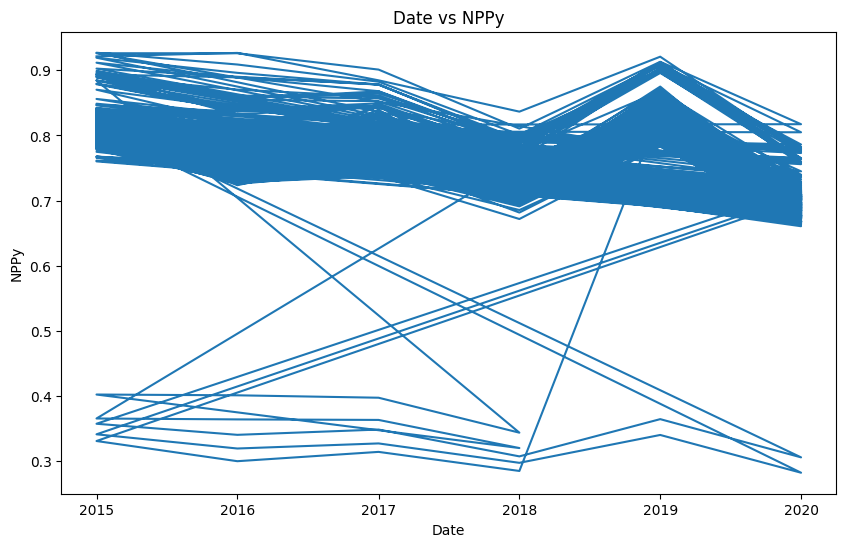

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Nppy['Date'], Nppy['NPPy'])
plt.xlabel('Date')
plt.ylabel('NPPy')
plt.title('Date vs NPPy')
plt.show()

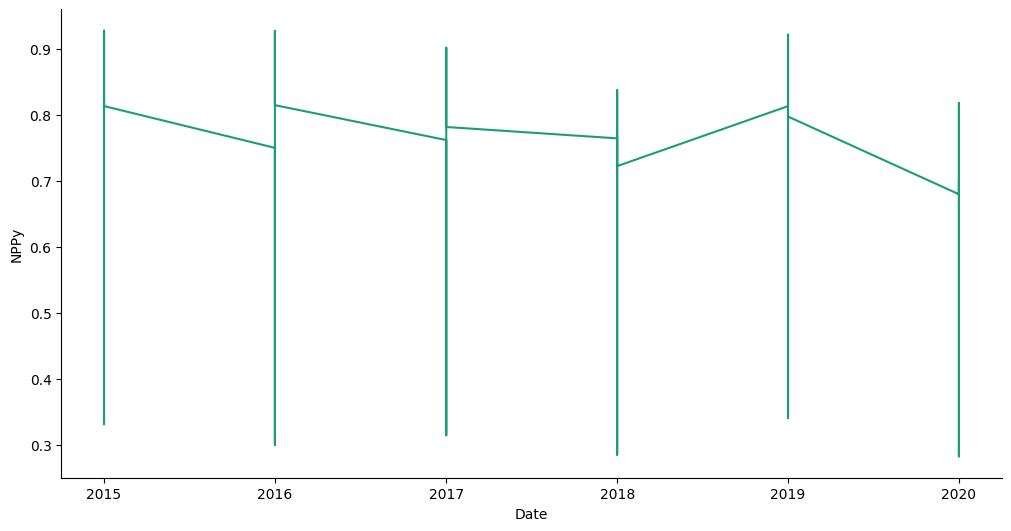

In [ ]:
# @title Date vs NPPy

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['NPPy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Nppy.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('NPPy')


In [ ]:
Nppy.drop(columns=['.geo'], inplace=True)

In [ ]:
# Extract year from the 'Date' column and create a new 'year' column
Nppy['year'] = Nppy['Date'].dt.year

In [ ]:
Nppy.head()

,Date,NPPy,latitude,longitude,year
6,2015-01-01,0.9215,41.175943,-96.444431,2015
7,2016-01-01,0.9268,41.175943,-96.444431,2016
8,2017-01-01,0.8847,41.175943,-96.444431,2017
9,2018-01-01,0.8366,41.175943,-96.444431,2018
10,2019-01-01,0.9210,41.175943,-96.444431,2019


In [ ]:
Nppy.drop(columns=['Date'], inplace=True)

In [ ]:
merged_df['year'] = merged_df['Date'].dt.year
merged_df.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year
0,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.152168,2015
1,2015-04-22,0.0648,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.390776,2015
2,2015-06-09,0.1390,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.556983,2015
3,2015-08-12,0.1513,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.605711,2015
4,2015-08-29,0.1422,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.658101,2015


In [ ]:
merged_df.shape

(33200, 8)

In [ ]:
merged_data = pd.merge(merged_df, Nppy, on=['year', 'latitude', 'longitude'], how='inner')
merged_data.head()

,Date,GPP,latitude,longitude,.geo,Gppy,NDVI,year,NPPy
0,2015-03-06,0.0171,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.152168,2015,0.9215
1,2015-04-22,0.0648,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.390776,2015,0.9215
2,2015-06-09,0.1390,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.556983,2015,0.9215
3,2015-08-12,0.1513,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.605711,2015,0.9215
4,2015-08-29,0.1422,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",1.6057,0.658101,2015,0.9215


In [ ]:
merged_data.shape

(32288, 9)

In [ ]:
# Rearrange the columns in the desired order
new_column_order = ['Date', 'latitude', 'longitude', '.geo', 'GPP', 'NDVI', 'Gppy', 'NPPy']
merged_data = merged_data[new_column_order]

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-03-06,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0171,0.152168,1.6057,0.9215
1,2015-04-22,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0648,0.390776,1.6057,0.9215
2,2015-06-09,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1390,0.556983,1.6057,0.9215
3,2015-08-12,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1513,0.605711,1.6057,0.9215
4,2015-08-29,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1422,0.658101,1.6057,0.9215


In [ ]:
merged_data.shape

(32288, 8)

In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0


In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy
0,2015-03-06,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0171,0.152168,1.6057,0.9215
1,2015-04-22,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0648,0.390776,1.6057,0.9215
2,2015-06-09,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1390,0.556983,1.6057,0.9215
3,2015-08-12,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1513,0.605711,1.6057,0.9215
4,2015-08-29,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1422,0.658101,1.6057,0.9215


In [ ]:
merged_data['Npp'] = (merged_data['GPP'] / merged_data['Gppy']) * merged_data['NPPy']

In [ ]:
merged_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp
0,2015-03-06,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0171,0.152168,1.6057,0.9215,0.009814
1,2015-04-22,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0648,0.390776,1.6057,0.9215,0.037188
2,2015-06-09,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1390,0.556983,1.6057,0.9215,0.079771
3,2015-08-12,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1513,0.605711,1.6057,0.9215,0.086830
4,2015-08-29,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.1422,0.658101,1.6057,0.9215,0.081608


In [ ]:
merged_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0


In [ ]:
merged_data.shape

(32288, 9)

In [ ]:
# Export the dataframe to a CSV file
merged_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_r_m_s/neb_r_m_s.csv', index=False)


## Ground Truth Data

In [ ]:
arm_data = pd.read_csv('/content/drive/Shareddrives/DATA298B/Ameriflux data/Nebraska/US-Ne3.csv', skiprows=2)
arm_data

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,CO2_PI_F_1_1_1,CO2_PI_F_1_2_1,CO2_PI_F_1_3_1,CO2_PI_F_1_4_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_PI_F_1_1_1,TA_PI_F_1_2_1,TA_PI_F_1_3_1,TA_PI_F_1_4_1,RH_PI_F_1_1_1,RH_PI_F_1_2_1,RH_PI_F_1_3_1,RH_PI_F_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,P_PI_F_1_1_1,P_PI_F_2_2_1,TS_PI_F_1_1_1,TS_PI_F_1_2_1,TS_PI_F_1_3_1,TS_PI_F_1_4_1,TS_PI_F_2_1_1,TS_PI_F_2_2_1,TS_PI_F_2_3_1,TS_PI_F_2_4_1,TS_PI_F_2_5_1,TS_PI_F_2_6_1,TS_PI_F_2_7_1,TS_PI_F_2_8_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_5_1,TS_2_6_1,TS_2_7_1,TS_2_8_1,PPFD_IN_PI_F_1_1_1,PPFD_OUT_PI_F_1_1_1,SW_IN_PI_F_1_1_1,SW_OUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,PPFD_DIF_PI_F_1_1_1,PPFD_DIR_PI_F_1_1_1,LW_IN_PI_F_1_1_1,LW_OUT_PI_F_1_1_1,SW_IN_1_1_1,SW_OUT_1_1_1,NETRAD_1_1_1,LW_IN_1_1_1,LW_OUT_1_1_1,FAPAR_PI_F_1_1_1,WD_1_1_1,WS_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_PI_F_1_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,NEE_PI_F_1_1_1,GPP_PI_F_1_1_1,RECO_PI_F_1_1_1,SWC_PI_F_1_1_1,SWC_PI_F_1_2_1,SWC_PI_F_1_3_1,SWC_PI_F_1_4_1,SWC_PI_F_1_5_1,SWC_PI_F_2_1_1,SWC_PI_F_2_2_1,SWC_PI_F_2_3_1,SWC_PI_F_2_4_1,SWC_PI_F_2_5_1,SWC_PI_F_3_1_1,SWC_PI_F_3_2_1,SWC_PI_F_3_3_1,SWC_PI_F_3_4_1,SWC_PI_F_3_5_1,SWC_PI_F_4_1_1,SWC_PI_F_4_2_1,SWC_PI_F_4_3_1,SWC_PI_F_4_4_1,SWC_PI_F_4_5_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_2_5_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1,SWC_3_5_1,SWC_4_1_1,SWC_4_2_1,SWC_4_3_1,SWC_4_4_1,SWC_4_5_1,SWC_PI_F_1,SWC_PI_1_N,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD,SWC_PI_F_5,SWC_PI_5_N,SWC_PI_5_SD
0,200101010000,200101010100,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,-9999.0,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,200101010100,200101010200,-9999.00,-9999.0,-9999.0,-9999.000,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.0,-9999.00,-9999.0,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.000,-9999.00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-99

In [ ]:
arm_data=arm_data.drop('TIMESTAMP_START',axis=1)

arm_data=arm_data.rename(columns={'TIMESTAMP_END': 'TIMESTAMP'})
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'], format='%Y%m%d%H%M')
arm_data = arm_data[(arm_data['TIMESTAMP'].dt.year >= 2015) & (arm_data['TIMESTAMP'].dt.year <= 2021)]
arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date
data = arm_data

<ipython-input-169-2cc50464675b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = pd.to_datetime(arm_data['TIMESTAMP'])
<ipython-input-169-2cc50464675b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm_data['TIMESTAMP'] = arm_data['TIMESTAMP'].dt.date


In [ ]:
# Define the column range to check (excluding the Date column)
cols_to_check = data.columns[2:]  # This excludes the Date column

# Use apply with a lambda function to check if all values from Col1 to Col149 are -9999.0
rows_to_keep = data[cols_to_check].apply(lambda row: not (row == -9999.0).all(), axis=1)

# Filter the DataFrame to retain rows where not all values are -9999.0
data= data[rows_to_keep]
data

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,CO2_PI_F_1_1_1,CO2_PI_F_1_2_1,CO2_PI_F_1_3_1,CO2_PI_F_1_4_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_PI_F_1_1_1,TA_PI_F_1_2_1,TA_PI_F_1_3_1,TA_PI_F_1_4_1,RH_PI_F_1_1_1,RH_PI_F_1_2_1,RH_PI_F_1_3_1,RH_PI_F_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,P_PI_F_1_1_1,P_PI_F_2_2_1,TS_PI_F_1_1_1,TS_PI_F_1_2_1,TS_PI_F_1_3_1,TS_PI_F_1_4_1,TS_PI_F_2_1_1,TS_PI_F_2_2_1,TS_PI_F_2_3_1,TS_PI_F_2_4_1,TS_PI_F_2_5_1,TS_PI_F_2_6_1,TS_PI_F_2_7_1,TS_PI_F_2_8_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_5_1,TS_2_6_1,TS_2_7_1,TS_2_8_1,PPFD_IN_PI_F_1_1_1,PPFD_OUT_PI_F_1_1_1,SW_IN_PI_F_1_1_1,SW_OUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,PPFD_DIF_PI_F_1_1_1,PPFD_DIR_PI_F_1_1_1,LW_IN_PI_F_1_1_1,LW_OUT_PI_F_1_1_1,SW_IN_1_1_1,SW_OUT_1_1_1,NETRAD_1_1_1,LW_IN_1_1_1,LW_OUT_1_1_1,FAPAR_PI_F_1_1_1,WD_1_1_1,WS_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_PI_F_1_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,NEE_PI_F_1_1_1,GPP_PI_F_1_1_1,RECO_PI_F_1_1_1,SWC_PI_F_1_1_1,SWC_PI_F_1_2_1,SWC_PI_F_1_3_1,SWC_PI_F_1_4_1,SWC_PI_F_1_5_1,SWC_PI_F_2_1_1,SWC_PI_F_2_2_1,SWC_PI_F_2_3_1,SWC_PI_F_2_4_1,SWC_PI_F_2_5_1,SWC_PI_F_3_1_1,SWC_PI_F_3_2_1,SWC_PI_F_3_3_1,SWC_PI_F_3_4_1,SWC_PI_F_3_5_1,SWC_PI_F_4_1_1,SWC_PI_F_4_2_1,SWC_PI_F_4_3_1,SWC_PI_F_4_4_1,SWC_PI_F_4_5_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_2_5_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1,SWC_3_5_1,SWC_4_1_1,SWC_4_2_1,SWC_4_3_1,SWC_4_4_1,SWC_4_5_1,SWC_PI_F_1,SWC_PI_1_N,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD,SWC_PI_F_5,SWC_PI_5_N,SWC_PI_5_SD
122711,2015-01-01,-9999.00,0.0,-9999.0,-9999.000,0.2,0.2,0.9,0.9,-20.3,411.32,412.09,412.08,412.88,-9999.00,-9999.00,-9999.00,-9999.00,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,0.0,0.0,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,0.07,-9999.00,1.17,2.10,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,0.07,-9999.00,1.17,2.10,0.0,0.0,-1.7,1.1,-59.2,0.0,-0.1,192.3,248.8,-1.7,1.1,-59.2,192.3,248.8,-9999.0,267,-9999.0,3.20,2.84,2.84,98.04,98.04,-9999.000,-0.30,0.0,0.0,0.0,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.00,15.6,40.5,45.50,45.4,44.2,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.00,15.6,40.5,45.50,45.4,44.2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
122712,2015-01-01,0.54,0.1,-9999.0,0.540,-0.5,-9999.0,16.6,-9999.0,-18.6,415.20,413.36,412.03,419.33,-9999.00,-9999.00,-9999.00,-9999.00,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,0.0,0.0,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,0.05,-9999.00,1.16,2.09,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,0.05,-9999.00,1.16,2.09,0.0,0.0,0.0,0.0,-51.3,-3.1,-4.4,194.7,246.0,0.0,0.0,-51.3,194.7,246.0,-9999.0,243,-9999.0,2.69,2.35,2.43,97.94,97.94,0.224,0.50,-9999.0,-9999.0,-9999.0,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.00,15.5,40.5,45.60,45.4,44.2,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.00,15.5,40.5,45.60,45.4,44.2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
122713,2015-01-01,-0.17,0.0,-9999.0,0.192,-1.1,-9999.0,14.0,-9999.0,-18.6,415.78,413.94,412.45,419.69,-9999.00,-9999.00,-9999.00,-9999.00,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,0.0,0.0,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,0.04,-9999.00,1.15,2.08,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,0.04,-9999.00,1.15,2.08,0.0,0.0,0.0,0.0,-53.6,-3.1,-4.4,195.0,248.6,0.0,0.0,-53.6,195.0,248.6,-9999.0,235,-9999.0,3.64,3.22,3.22,97.88,97.88,0.068,-0.20,-9999.0,-9999.0,-999

In [ ]:
# Function to rename columns by replacing '_IN_' with 'IN' and '_OUT_' with 'OUT'
def rename_in_out_columns(col_name):
    if '_IN_' in col_name:
        return col_name.replace('_IN_', 'IN_')
    elif '_OUT_' in col_name:
        return col_name.replace('_OUT_', 'OUT_')
    else:
        return col_name

# Apply the function to all columns
data.columns = [rename_in_out_columns(col) for col in arm_data.columns]

# Display the first few rows to check the results
data.head()

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,LE_PI_F_1_1_1,H_1_1_1,H_PI_F_1_1_1,G_PI_F_1_1_1,CO2_PI_F_1_1_1,CO2_PI_F_1_2_1,CO2_PI_F_1_3_1,CO2_PI_F_1_4_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_PI_F_1_1_1,TA_PI_F_1_2_1,TA_PI_F_1_3_1,TA_PI_F_1_4_1,RH_PI_F_1_1_1,RH_PI_F_1_2_1,RH_PI_F_1_3_1,RH_PI_F_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,P_PI_F_1_1_1,P_PI_F_2_2_1,TS_PI_F_1_1_1,TS_PI_F_1_2_1,TS_PI_F_1_3_1,TS_PI_F_1_4_1,TS_PI_F_2_1_1,TS_PI_F_2_2_1,TS_PI_F_2_3_1,TS_PI_F_2_4_1,TS_PI_F_2_5_1,TS_PI_F_2_6_1,TS_PI_F_2_7_1,TS_PI_F_2_8_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_5_1,TS_2_6_1,TS_2_7_1,TS_2_8_1,PPFDIN_PI_F_1_1_1,PPFDOUT_PI_F_1_1_1,SWIN_PI_F_1_1_1,SWOUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,PPFD_DIF_PI_F_1_1_1,PPFD_DIR_PI_F_1_1_1,LWIN_PI_F_1_1_1,LWOUT_PI_F_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,FAPAR_PI_F_1_1_1,WD_1_1_1,WS_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_PI_F_1_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,NEE_PI_F_1_1_1,GPP_PI_F_1_1_1,RECO_PI_F_1_1_1,SWC_PI_F_1_1_1,SWC_PI_F_1_2_1,SWC_PI_F_1_3_1,SWC_PI_F_1_4_1,SWC_PI_F_1_5_1,SWC_PI_F_2_1_1,SWC_PI_F_2_2_1,SWC_PI_F_2_3_1,SWC_PI_F_2_4_1,SWC_PI_F_2_5_1,SWC_PI_F_3_1_1,SWC_PI_F_3_2_1,SWC_PI_F_3_3_1,SWC_PI_F_3_4_1,SWC_PI_F_3_5_1,SWC_PI_F_4_1_1,SWC_PI_F_4_2_1,SWC_PI_F_4_3_1,SWC_PI_F_4_4_1,SWC_PI_F_4_5_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_2_5_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1,SWC_3_5_1,SWC_4_1_1,SWC_4_2_1,SWC_4_3_1,SWC_4_4_1,SWC_4_5_1,SWC_PI_F_1,SWC_PI_1_N,SWC_PI_1_SD,SWC_PI_F_2,SWC_PI_2_N,SWC_PI_2_SD,SWC_PI_F_3,SWC_PI_3_N,SWC_PI_3_SD,SWC_PI_F_4,SWC_PI_4_N,SWC_PI_4_SD,SWC_PI_F_5,SWC_PI_5_N,SWC_PI_5_SD
122711,2015-01-01,-9999.00,0.0,-9999.0,-9999.000,0.2,0.2,0.9,0.9,-20.3,411.32,412.09,412.08,412.88,-9999.0,-9999.0,-9999.0,-9999.0,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,0.0,0.0,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,0.07,-9999.0,1.17,2.10,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,0.07,-9999.0,1.17,2.10,0.0,0.0,-1.7,1.1,-59.2,0.0,-0.1,192.3,248.8,-1.7,1.1,-59.2,192.3,248.8,-9999.0,267,-9999.0,3.20,2.84,2.84,98.04,98.04,-9999.000,-0.3,0.0,0.0,0.0,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.0,15.6,40.5,45.5,45.4,44.2,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.0,15.6,40.5,45.5,45.4,44.2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
122712,2015-01-01,0.54,0.1,-9999.0,0.540,-0.5,-9999.0,16.6,-9999.0,-18.6,415.20,413.36,412.03,419.33,-9999.0,-9999.0,-9999.0,-9999.0,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,0.0,0.0,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,0.05,-9999.0,1.16,2.09,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,0.05,-9999.0,1.16,2.09,0.0,0.0,0.0,0.0,-51.3,-3.1,-4.4,194.7,246.0,0.0,0.0,-51.3,194.7,246.0,-9999.0,243,-9999.0,2.69,2.35,2.43,97.94,97.94,0.224,0.5,-9999.0,-9999.0,-9999.0,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.0,15.5,40.5,45.6,45.4,44.2,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.0,15.5,40.5,45.6,45.4,44.2,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
122713,2015-01-01,-0.17,0.0,-9999.0,0.192,-1.1,-9999.0,14.0,-9999.0,-18.6,415.78,413.94,412.45,419.69,-9999.0,-9999.0,-9999.0,-9999.0,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,0.0,0.0,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,0.04,-9999.0,1.15,2.08,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,0.04,-9999.0,1.15,2.08,0.0,0.0,0.0,0.0,-53.6,-3.1,-4.4,195.0,248.6,0.0,0.0,-53.6,195.0,248.6,-9999.0,235,-9999.0,3.64,3.22,3.22,97.88,97.88,0.068,-0.2,-9999.0,-9999.0,-9999.0,20.9,36.1,40.4,37.1,43.3,22.7,40.4,

In [ ]:
# Replace -9999.0 with NaN
data.replace(-9999.0, np.nan, inplace=True)

# Count missing values (NaNs) in each column
missing_values_count = data.isnull().sum()

# Calculate percentage of missing values in each column
missing_values_percent = (missing_values_count / len(data)) * 100

# Drop columns where missing values exceed 50%
data = data.drop(columns=missing_values_percent[missing_values_percent > 40].index)

# Ensure pandas shows all columns
pd.set_option('display.max_columns', None)
data

,TIMESTAMP,FC_1_1_1,SC_PI_F_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,H_1_1_1,G_PI_F_1_1_1,CO2_PI_F_1_1_1,CO2_PI_F_1_2_1,CO2_PI_F_1_3_1,CO2_PI_F_1_4_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_PI_F_1_1_1,TA_PI_F_1_2_1,TA_PI_F_1_3_1,TA_PI_F_1_4_1,RH_PI_F_1_1_1,RH_PI_F_1_2_1,RH_PI_F_1_3_1,RH_PI_F_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,P_PI_F_1_1_1,P_PI_F_2_2_1,TS_PI_F_1_1_1,TS_PI_F_1_2_1,TS_PI_F_1_3_1,TS_PI_F_1_4_1,TS_PI_F_2_1_1,TS_PI_F_2_2_1,TS_PI_F_2_3_1,TS_PI_F_2_4_1,TS_PI_F_2_6_1,TS_PI_F_2_8_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_6_1,TS_2_8_1,PPFDIN_PI_F_1_1_1,PPFDOUT_PI_F_1_1_1,SWIN_PI_F_1_1_1,SWOUT_PI_F_1_1_1,NETRAD_PI_F_1_1_1,PPFD_DIF_PI_F_1_1_1,PPFD_DIR_PI_F_1_1_1,LWIN_PI_F_1_1_1,LWOUT_PI_F_1_1_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,WD_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_PI_F_1_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,SWC_PI_F_1_1_1,SWC_PI_F_1_2_1,SWC_PI_F_1_3_1,SWC_PI_F_1_4_1,SWC_PI_F_1_5_1,SWC_PI_F_2_1_1,SWC_PI_F_2_2_1,SWC_PI_F_2_3_1,SWC_PI_F_2_4_1,SWC_PI_F_2_5_1,SWC_PI_F_3_1_1,SWC_PI_F_3_2_1,SWC_PI_F_3_3_1,SWC_PI_F_3_4_1,SWC_PI_F_3_5_1,SWC_PI_F_4_1_1,SWC_PI_F_4_2_1,SWC_PI_F_4_3_1,SWC_PI_F_4_4_1,SWC_PI_F_4_5_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_2_5_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1,SWC_3_5_1,SWC_4_1_1,SWC_4_2_1,SWC_4_3_1,SWC_4_4_1,SWC_4_5_1
122711,2015-01-01,NaN,0.0,NaN,NaN,0.2,0.9,-20.3,411.32,412.09,412.08,412.88,NaN,NaN,NaN,NaN,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,0.0,0.0,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,NaN,2.10,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,NaN,2.10,0.0,0.0,-1.7,1.1,-59.2,0.0,-0.1,192.3,248.8,-1.7,1.1,-59.2,192.3,248.8,267,3.20,2.84,2.84,98.04,98.04,NaN,-0.30,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.00,15.6,40.5,45.50,45.4,44.2,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.00,15.6,40.5,45.50,45.4,44.2
122712,2015-01-01,0.54,0.1,NaN,0.540,-0.5,16.6,-18.6,415.20,413.36,412.03,419.33,NaN,NaN,NaN,NaN,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,0.0,0.0,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,NaN,2.09,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,NaN,2.09,0.0,0.0,0.0,0.0,-51.3,-3.1,-4.4,194.7,246.0,0.0,0.0,-51.3,194.7,246.0,243,2.69,2.35,2.43,97.94,97.94,0.224,0.50,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.00,15.5,40.5,45.60,45.4,44.2,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.00,15.5,40.5,45.60,45.4,44.2
122713,2015-01-01,-0.17,0.0,NaN,0.192,-1.1,14.0,-18.6,415.78,413.94,412.45,419.69,NaN,NaN,NaN,NaN,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,0.0,0.0,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,NaN,2.08,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,NaN,2.08,0.0,0.0,0.0,0.0,-53.6,-3.1,-4.4,195.0,248.6,0.0,0.0,-53.6,195.0,248.6,235,3.64,3.22,3.22,97.88,97.88,0.068,-0.20,20.9,36.1,40.4,37.1,43.3,22.7,40.4,35.4,29.0,41.5,14.0,38.2,39.9,39.0,42.10,15.5,40.5,45.60,45.4,44.2,20.9,36.1,40.4,37.1,43.3,22.7,40.4,35.4,29.0,41.5,14.0,38.2,39.9,39.0,42.10,15.5,40.5,45.60,45.4,44.2
122714,2015-01-01,-0.30,0.0,NaN,0.073,1.7,26.0,-17.2,416.01,414.16,412.83,420.15,NaN,NaN,NaN,NaN,-12.53,-13.44,-13.01,-13.27,80.0,88.4,79.8,85.0,-12.53,-13.44,-13.01,-13.27,80.0,88.4,79.8,85.0,0.0,0.0,-3.93,-2.20,-1.86,-0.71,-5.72,-3.92,-2.29,-1.30,NaN,2.06,-3.93,-2.20,-1.86,-0.71,-5.72,-3.92,-2.29,-1.30,NaN,2.06,0.0,0.0,0.0,0.0,-51.2,-3.1,-4.4,198.5,249.6,0.0,0.0,-51.2,198.5,249.6,273,3.29,2.88,2.57,97.83,97.83,0.443,-0.30,20.6,36.2,40.5,37.1,43.3,22.5,40.4,35.4,29.0,41.5,13.9,38.1,40.0,39.0,42.00,15.4,40.4,45.60,45.4,44.1,20.6,36.2,40.5,37.1,43.3,22.5,40.4,35.4,29.0,41.5,13.9,38.1,40.0,39.0,42.00,15.4,40.4,45.60,45.4,44.1
122715,2015-01-01,-0.03,0.0,NaN,NaN,-0.9,-4.4,-12.6,

In [ ]:
fc_columns = [col for col in data.columns if 'FC' in col]
pi_columns = [col for col in data.columns if '_PI_F' in col]
data=data.drop(pi_columns, axis=1)
data

,TIMESTAMP,FC_1_1_1,SC_1_1_1,USTAR_1_1_1,LE_1_1_1,H_1_1_1,CO2_1_1_1,CO2_1_2_1,CO2_1_3_1,CO2_1_4_1,TA_1_1_1,TA_1_2_1,TA_1_3_1,TA_1_4_1,RH_1_1_1,RH_1_2_1,RH_1_3_1,RH_1_4_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_2_1_1,TS_2_2_1,TS_2_3_1,TS_2_4_1,TS_2_6_1,TS_2_8_1,SWIN_1_1_1,SWOUT_1_1_1,NETRAD_1_1_1,LWIN_1_1_1,LWOUT_1_1_1,WD_1_1_1,WS_1_2_1,WS_1_3_1,WS_2_1_1,PA_1_1_1,ZL_1_1_1,NEE_PI_1_1_1,SWC_1_1_1,SWC_1_2_1,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,SWC_2_1_1,SWC_2_2_1,SWC_2_3_1,SWC_2_4_1,SWC_2_5_1,SWC_3_1_1,SWC_3_2_1,SWC_3_3_1,SWC_3_4_1,SWC_3_5_1,SWC_4_1_1,SWC_4_2_1,SWC_4_3_1,SWC_4_4_1,SWC_4_5_1
122711,2015-01-01,NaN,NaN,NaN,0.2,0.9,NaN,NaN,NaN,NaN,-12.39,-13.27,-12.83,-13.12,76.5,84.3,76.2,81.9,-3.85,-2.11,-1.76,-0.61,-5.61,-3.77,-2.15,-1.18,NaN,2.10,-1.7,1.1,-59.2,192.3,248.8,267,3.20,2.84,2.84,98.04,NaN,-0.30,21.5,36.2,40.4,37.1,43.3,23.0,40.4,35.4,29.1,41.5,14.1,38.2,40.0,39.0,42.00,15.6,40.5,45.50,45.4,44.2
122712,2015-01-01,0.54,NaN,0.540,-0.5,16.6,NaN,NaN,NaN,NaN,-12.84,-13.84,-13.67,-14.17,79.1,87.7,79.9,85.6,-3.79,-2.12,-1.78,-0.64,-5.60,-3.81,-2.20,-1.22,NaN,2.09,0.0,0.0,-51.3,194.7,246.0,243,2.69,2.35,2.43,97.94,0.224,0.50,21.2,36.1,40.4,37.1,43.3,22.8,40.4,35.4,29.1,41.5,14.0,38.2,40.0,39.0,42.00,15.5,40.5,45.60,45.4,44.2
122713,2015-01-01,-0.17,NaN,0.192,-1.1,14.0,NaN,NaN,NaN,NaN,-12.86,-13.79,-13.34,-13.55,80.1,88.7,80.1,85.0,-3.89,-2.16,-1.82,-0.67,-5.69,-3.87,-2.25,-1.26,NaN,2.08,0.0,0.0,-53.6,195.0,248.6,235,3.64,3.22,3.22,97.88,0.068,-0.20,20.9,36.1,40.4,37.1,43.3,22.7,40.4,35.4,29.0,41.5,14.0,38.2,39.9,39.0,42.10,15.5,40.5,45.60,45.4,44.2
122714,2015-01-01,-0.30,NaN,0.073,1.7,26.0,NaN,NaN,NaN,NaN,-12.53,-13.44,-13.01,-13.27,80.0,88.4,79.8,85.0,-3.93,-2.20,-1.86,-0.71,-5.72,-3.92,-2.29,-1.30,NaN,2.06,0.0,0.0,-51.2,198.5,249.6,273,3.29,2.88,2.57,97.83,0.443,-0.30,20.6,36.2,40.5,37.1,43.3,22.5,40.4,35.4,29.0,41.5,13.9,38.1,40.0,39.0,42.00,15.4,40.4,45.60,45.4,44.1
122715,2015-01-01,-0.03,NaN,NaN,-0.9,-4.4,NaN,NaN,NaN,NaN,-12.03,-13.01,-12.76,-13.35,81.2,89.8,81.3,87.2,-3.81,-2.20,-1.87,-0.74,-5.61,-3.91,-2.32,-1.34,NaN,2.05,0.0,0.0,-44.0,204.6,248.6,272,2.07,1.73,1.50,97.78,-0.187,-0.10,20.2,36.1,40.5,37.1,43.3,22.3,40.4,35.4,29.0,41.5,13.8,38.2,40.0,39.0,41.90,15.3,40.4,45.60,45.4,44.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,0.29,NaN,0.519,NaN,14.3,424.27,424.25,424.30,NaN,-7.44,-7.42,-7.36,-7.37,82.3,82.9,84.0,89.3,-2.04,-1.90,-1.20,0.04,-2.25,-1.66,-1.13,-0.43,0.53,2.30,0.0,0.7,-4.2,277.5,281.0,14,6.22,5.49,5.88,96.71,-0.004,0.28,30.0,34.2,33.6,35.0,34.2,35.6,39.0,37.3,30.6,41.3,37.4,35.9,31.6,34.0,43.59,33.0,37.0,42.34,41.8,44.0
184075,2021-12-31,0.20,0.1,0.612,NaN,28.1,425.33,425.24,425.23,425.31,-8.23,-8.19,-8.13,-8.08,79.5,80.1,81.3,86.7,-2.13,-1.99,-1.27,0.01,-2.37,-1.75,-1.18,-0.45,0.52,2.29,0.0,0.4,-3.5,274.8,277.9,4,6.71,5.87,6.32,96.83,-0.004,0.30,30.0,34.2,33.6,35.0,34.1,35.6,39.1,37.3,30.6,41.5,37.4,35.9,31.6,34.0,43.40,32.9,37.0,42.34,41.8,44.0
184076,2021-12-31,0.24,0.1,0.598,NaN,9.6,426.31,426.36,426.35,426.34,-9.26,-9.23,-9.14,-9.02,77.5,78.1,79.5,84.4,-2.30,-2.09,-1.35,-0.01,-2.56,-1.88,-1.24,-0.46,0.50,2.28,0.0,0.4,-3.0,271.4,274.0,4,6.97,6.15,6.51,96.98,-0.002,0.37,30.0,34.1,33.6,35.0,34.2,35.6,39.0,37.3,30.6,41.5,37.3,35.9,31.6,34.0,43.48,32.9,37.0,42.34,41.8,44.0
184077,2021-12-31,0.34,0.0,0.629,NaN,18.8,425.98,426.03,426.03,425.97,-9.83,-9.80,-9.70,-9.55,77.1,77.6,78.9,83.3,-2.45,-2.21,-1.44,-0.04,-2.75,-2.02,-1.31,-0.48,0.49,2.28,0.0,0.3,-2.8,269.4,271.8,359,7.15,6.27,6.58,97.08,-0.003,0.37,30.0,34.2,33.7,35.0,34.2,35.6,39.0,37.3,30.6,41.5,37.3,35.9,31.6,34.0,43.56,32.9,36.0,42.34,41.8,44.0


In [ ]:
# Extract unique parameters and heights from column names
column_names = data.columns
parameters = set()
heights = set()

# Identify parameters and heights based on column names
for col in column_names:
    parts = col.split('_')
    if len(parts) > 1:
        parameters.add(parts[0])
        heights.add('_'.join(parts[1:]))

# Convert sets to sorted lists
parameters = sorted(parameters)
heights = sorted(heights)

# Create new columns for maximum values
for param in parameters:
    # Collect column names for this parameter across all heights
    columns = [f'{param}_{height}' for height in heights if f'{param}_{height}' in data.columns]

    if columns:
        # Create a new column for the maximum value of this parameter across heights
        data[f'{param}'] = data[columns].max(axis=1)

# Optionally, drop the original columns if needed
data.drop(columns=[f'{param}_{height}' for param in parameters for height in heights if f'{param}_{height}' in data.columns], inplace=True)
# Reorder columns to place 'timestamp' as the first column
if 'TIMESTAMP' in data.columns:
    cols = ['TIMESTAMP'] + [col for col in data.columns if col != 'TIMESTAMP']
    data = data[cols]
# Display the first few rows to check the results
data

,TIMESTAMP,CO2,FC,H,LE,LWIN,LWOUT,NEE,NETRAD,PA,RH,SC,SWC,SWIN,SWOUT,TA,TS,USTAR,WD,WS,ZL
122711,2015-01-01,NaN,NaN,0.9,0.2,192.3,248.8,-0.30,-59.2,98.04,84.3,NaN,45.5,-1.7,1.1,-12.39,2.10,NaN,267,3.20,NaN
122712,2015-01-01,NaN,0.54,16.6,-0.5,194.7,246.0,0.50,-51.3,97.94,87.7,NaN,45.6,0.0,0.0,-12.84,2.09,0.540,243,2.69,0.224
122713,2015-01-01,NaN,-0.17,14.0,-1.1,195.0,248.6,-0.20,-53.6,97.88,88.7,NaN,45.6,0.0,0.0,-12.86,2.08,0.192,235,3.64,0.068
122714,2015-01-01,NaN,-0.30,26.0,1.7,198.5,249.6,-0.30,-51.2,97.83,88.4,NaN,45.6,0.0,0.0,-12.53,2.06,0.073,273,3.29,0.443
122715,2015-01-01,NaN,-0.03,-4.4,-0.9,204.6,248.6,-0.10,-44.0,97.78,89.8,NaN,45.6,0.0,0.0,-12.03,2.05,NaN,272,2.07,-0.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184074,2021-12-31,424.30,0.29,14.3,NaN,277.5,281.0,0.28,-4.2,96.71,89.3,NaN,44.0,0.0,0.7,-7.36,2.30,0.519,14,6.22,-0.004
184075,2021-12-31,425.33,0.20,28.1,NaN,274.8,277.9,0.30,-3.5,96.83,86.7,0.1,44.0,0.0,0.4,-8.08,2.29,0.612,4,6.71,-0.004
184076,2021-12-31,426.36,0.24,9.6,NaN,271.4,274.0,0.37,-3.0,96.98,84.4,0.1,44.0,0.0,0.4,-9.02,2.28,0.598,4,6.97,-0.002
184077,2021-12-31,426.03,0.34,18.8,NaN,269.4,271.8,0.37,-2.8,97.08,83.3,0.0,44.0,0.0,0.3,-9.55,2.28,0.629,359,7.15,-0.003


In [ ]:
print(data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH']].head())

         TIMESTAMP     H    TS     TA    WS   WD     PA    RH
122711  2015-01-01   0.9  2.10 -12.39  3.20  267  98.04  84.3
122712  2015-01-01  16.6  2.09 -12.84  2.69  243  97.94  87.7
122713  2015-01-01  14.0  2.08 -12.86  3.64  235  97.88  88.7
122714  2015-01-01  26.0  2.06 -12.53  3.29  273  97.83  88.4
122715  2015-01-01  -4.4  2.05 -12.03  2.07  272  97.78  89.8


In [ ]:
data.shape

(61368, 21)

In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
CO2,1395
FC,7435
H,7875
LE,8559
LWIN,402
LWOUT,521
NEE,7434
NETRAD,1212
PA,1414


In [ ]:
data.dropna(axis=0, how='any', inplace=True)


In [ ]:
data = data[['TIMESTAMP', 'H', 'TS', 'TA','WS', 'WD', 'PA','RH']]

In [ ]:
data_agg = data.groupby('TIMESTAMP').mean()

In [ ]:
data_agg.columns

Index(['H', 'TS', 'TA', 'WS', 'WD', 'PA', 'RH'], dtype='object')

In [ ]:
data_agg.head()

,H,TS,TA,WS,WD,PA,RH
TIMESTAMP,,,,,,,
2015-01-01,-15.775000,1.847500,-4.472500,1.367500,193.250000,97.682500,97.350000
2015-01-02,-15.900000,1.728235,-4.008824,2.434118,210.588235,97.663529,91.688235
2015-01-03,-27.175000,1.551000,-5.803500,5.254000,266.600000,96.965000,92.675000
2015-01-04,2.569565,1.410435,-15.015652,7.001739,329.347826,98.846087,77.321739
2015-01-05,2.325000,1.244500,-10.930500,4.998000,220.700000,98.560500,87.290000


In [ ]:
data_agg.shape

(2256, 7)

In [ ]:
data_agg = data_agg.reset_index()

In [ ]:
data_agg = data_agg.rename(columns={'TIMESTAMP': 'Date'})

In [ ]:
data_agg.head()

,Date,H,TS,TA,WS,WD,PA,RH
0,2015-01-01,-15.775000,1.847500,-4.472500,1.367500,193.250000,97.682500,97.350000
1,2015-01-02,-15.900000,1.728235,-4.008824,2.434118,210.588235,97.663529,91.688235
2,2015-01-03,-27.175000,1.551000,-5.803500,5.254000,266.600000,96.965000,92.675000
3,2015-01-04,2.569565,1.410435,-15.015652,7.001739,329.347826,98.846087,77.321739
4,2015-01-05,2.325000,1.244500,-10.930500,4.998000,220.700000,98.560500,87.290000


In [ ]:
data_agg.isna().sum()

,0
Date,0
H,0
TS,0
TA,0
WS,0
WD,0
PA,0
RH,0


In [ ]:
print(merged_data['Date'].dtype)
print(data_agg['Date'].dtype)

datetime64[ns]
object


In [ ]:
data_agg['Date'] = pd.to_datetime(data_agg['Date'])

In [ ]:
merged_data.Date.unique()

<DatetimeArray>
['2015-03-06 00:00:00', '2015-04-22 00:00:00', '2015-06-09 00:00:00',
 '2015-08-12 00:00:00', '2015-08-29 00:00:00', '2015-11-01 00:00:00',
 '2015-11-17 00:00:00', '2015-12-02 00:00:00', '2016-02-18 00:00:00',
 '2016-03-05 00:00:00', '2016-04-05 00:00:00', '2016-05-08 00:00:00',
 '2016-05-23 00:00:00', '2016-06-08 00:00:00', '2016-06-25 00:00:00',
 '2017-01-16 00:00:00', '2017-02-17 00:00:00', '2017-04-06 00:00:00',
 '2017-04-22 00:00:00', '2017-05-09 00:00:00', '2017-05-24 00:00:00',
 '2017-06-09 00:00:00', '2017-06-25 00:00:00', '2017-07-12 00:00:00',
 '2017-08-12 00:00:00', '2017-10-15 00:00:00', '2017-11-01 00:00:00',
 '2017-11-17 00:00:00', '2017-12-02 00:00:00', '2018-03-05 00:00:00',
 '2018-05-08 00:00:00', '2018-05-25 00:00:00', '2018-07-11 00:00:00',
 '2018-10-16 00:00:00', '2018-06-26 00:00:00', '2015-01-16 00:00:00',
 '2017-07-27 00:00:00', '2016-07-26 00:00:00', '2015-03-22 00:00:00',
 '2015-05-24 00:00:00']
Length: 40, dtype: datetime64[ns]

In [ ]:
final_data = pd.merge(merged_data,data_agg, on='Date', how='inner')

In [ ]:
final_data

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,H,TS,TA,WS,WD,PA,RH
0,2015-03-06,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0171,0.152168,1.6057,0.9215,0.009814,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
1,2015-03-06,41.175943,-96.444162,"{""type"":""Point"",""coordinates"":[-96.44416196564...",0.0154,0.150432,1.4876,0.8471,0.008769,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
2,2015-03-06,41.175943,-96.443892,"{""type"":""Point"",""coordinates"":[-96.44389247106...",0.0148,0.156869,1.4492,0.8188,0.008362,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
3,2015-03-06,41.175943,-96.443623,"{""type"":""Point"",""coordinates"":[-96.44362297647...",0.0148,0.156869,1.4661,0.8221,0.008299,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
4,2015-03-06,41.175943,-96.443353,"{""type"":""Point"",""coordinates"":[-96.44335348189...",0.0136,0.144144,1.4566,0.8153,0.007612,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26236,2015-03-22,41.182680,-96.436347,"{""type"":""Point"",""coordinates"":[-96.43634662267...",0.0215,0.143426,1.5457,0.8151,0.011338,0.373684,7.683158,10.636842,4.865789,184.263158,97.145263,68.036842
26237,2015-03-22,41.182680,-96.436077,"{""type"":""Point"",""coordinates"":[-96.43607712809...",0.0213,0.160827,1.5509,0.8184,0.011240,0.373684,7.683158,10.636842,4.865789,184.263158,97.145263,68.036842
26238,2015-03-22,41.182680,-96.435808,"{""type"":""Point"",""coordinates"":[-96.43580763350...",0.0213,0.145967,1.5594,0.8175,0.011166,0.373684,7.683158,10.636842,4.865789,184.263158,97.145263,68.036842
26239,2015-03-22,41.182680,-96.435538,"{""type"":""Point"",""coordinates"":[-96.43553813892...",0.0211,0.145967,1.5677,0.8210,0.011050,0.373684,7.683158,10.636842,4.865789,184.263158,97.145263,68.036842


In [ ]:
final_data = final_data.rename(columns={
    'H': 'Humidity',
    'TS': 'Soil Temperature',
    'TA': 'Air Temperature',
    'WS': 'Wind Speed',
    'WD': 'Wind Direction',
    'PA': 'Atmospheric Pressure',
    'RH': 'Relative Humidity',
    'P': 'Precipitation'
})

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,Gppy,NPPy,Npp,Humidity,Soil Temperature,Air Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity
0,2015-03-06,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0171,0.152168,1.6057,0.9215,0.009814,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
1,2015-03-06,41.175943,-96.444162,"{""type"":""Point"",""coordinates"":[-96.44416196564...",0.0154,0.150432,1.4876,0.8471,0.008769,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
2,2015-03-06,41.175943,-96.443892,"{""type"":""Point"",""coordinates"":[-96.44389247106...",0.0148,0.156869,1.4492,0.8188,0.008362,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
3,2015-03-06,41.175943,-96.443623,"{""type"":""Point"",""coordinates"":[-96.44362297647...",0.0148,0.156869,1.4661,0.8221,0.008299,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385
4,2015-03-06,41.175943,-96.443353,"{""type"":""Point"",""coordinates"":[-96.44335348189...",0.0136,0.144144,1.4566,0.8153,0.007612,7.469231,-0.330769,2.572308,2.843077,229.769231,97.785385,71.015385


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


In [ ]:
final_data.isna().sum()

,0
Date,0
latitude,0
longitude,0
.geo,0
GPP,0
NDVI,0
Gppy,0
NPPy,0
Npp,0
Humidity,0


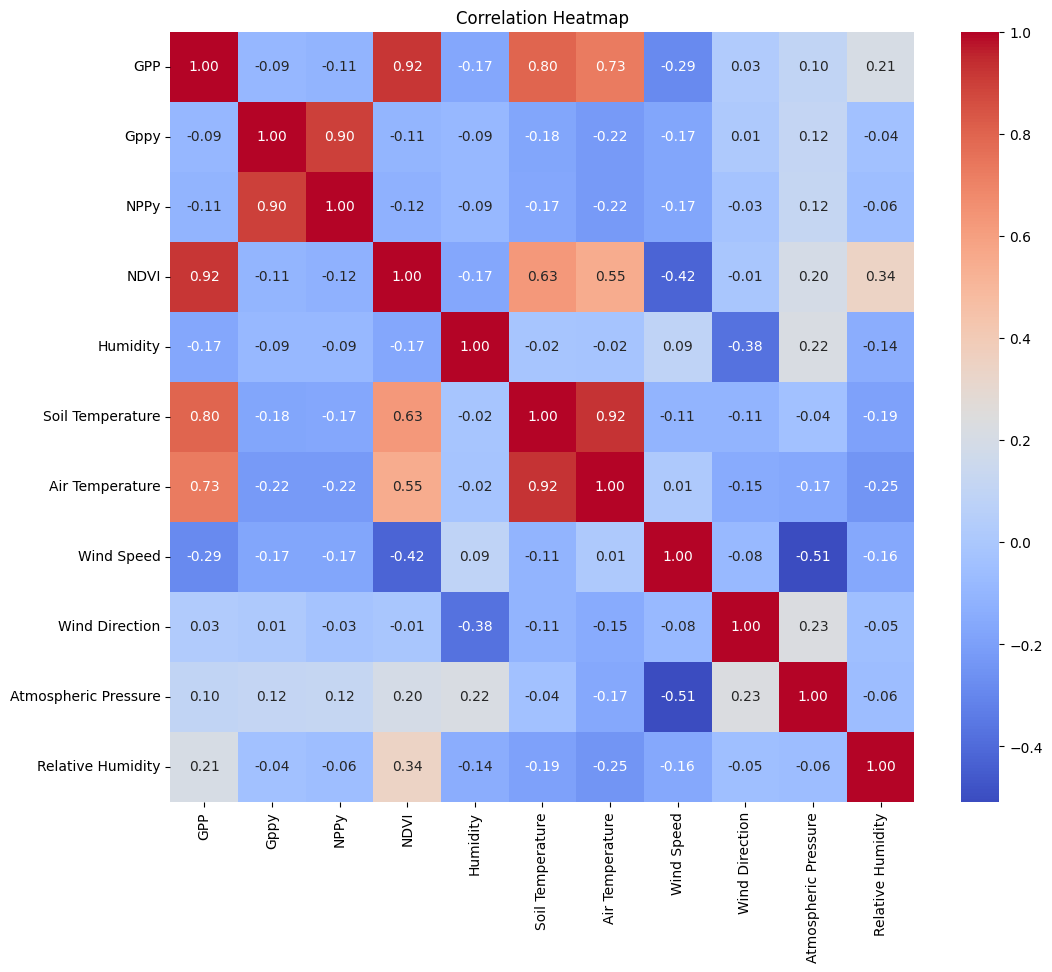

In [ ]:
# Select the columns for correlation analysis
columns_for_correlation = ['GPP','Gppy', 'NPPy', 'NDVI', 'Humidity','Soil Temperature','Air Temperature'
                             ,'Wind Speed','Wind Direction','Atmospheric Pressure','Relative Humidity']

# Calculate the correlation matrix
correlation_matrix = final_data[columns_for_correlation].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Find pairs of features with correlation greater than 0.85
for i in range(len(correlation_matrix.columns)):
  for j in range(i + 1, len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[i, j]) > 0.80:
      print(f'{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]} have a correlation of {correlation_matrix.iloc[i, j]:.2f}')

GPP and NDVI have a correlation of 0.92
Gppy and NPPy have a correlation of 0.90
Soil Temperature and Air Temperature have a correlation of 0.92


In [ ]:
final_data.drop(columns=['Gppy','Air Temperature'], inplace= True)

In [ ]:
final_data.head()

,Date,latitude,longitude,.geo,GPP,NDVI,NPPy,Npp,Humidity,Soil Temperature,Wind Speed,Wind Direction,Atmospheric Pressure,Relative Humidity
0,2015-03-06,41.175943,-96.444431,"{""type"":""Point"",""coordinates"":[-96.44443146023...",0.0171,0.152168,0.9215,0.009814,7.469231,-0.330769,2.843077,229.769231,97.785385,71.015385
1,2015-03-06,41.175943,-96.444162,"{""type"":""Point"",""coordinates"":[-96.44416196564...",0.0154,0.150432,0.8471,0.008769,7.469231,-0.330769,2.843077,229.769231,97.785385,71.015385
2,2015-03-06,41.175943,-96.443892,"{""type"":""Point"",""coordinates"":[-96.44389247106...",0.0148,0.156869,0.8188,0.008362,7.469231,-0.330769,2.843077,229.769231,97.785385,71.015385
3,2015-03-06,41.175943,-96.443623,"{""type"":""Point"",""coordinates"":[-96.44362297647...",0.0148,0.156869,0.8221,0.008299,7.469231,-0.330769,2.843077,229.769231,97.785385,71.015385
4,2015-03-06,41.175943,-96.443353,"{""type"":""Point"",""coordinates"":[-96.44335348189...",0.0136,0.144144,0.8153,0.007612,7.469231,-0.330769,2.843077,229.769231,97.785385,71.015385


In [ ]:
final_data.shape

(26241, 14)

In [ ]:
final_data.to_csv('/content/drive/Shareddrives/DATA298B/Landsat_Data/Nebraska/Data_Neb_r_m_s/Final_merged_data.csv', index=False)